In [1]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from scipy import stats

In [2]:
#Abro la imagen
imagen= Image.open('CilCon4.png')

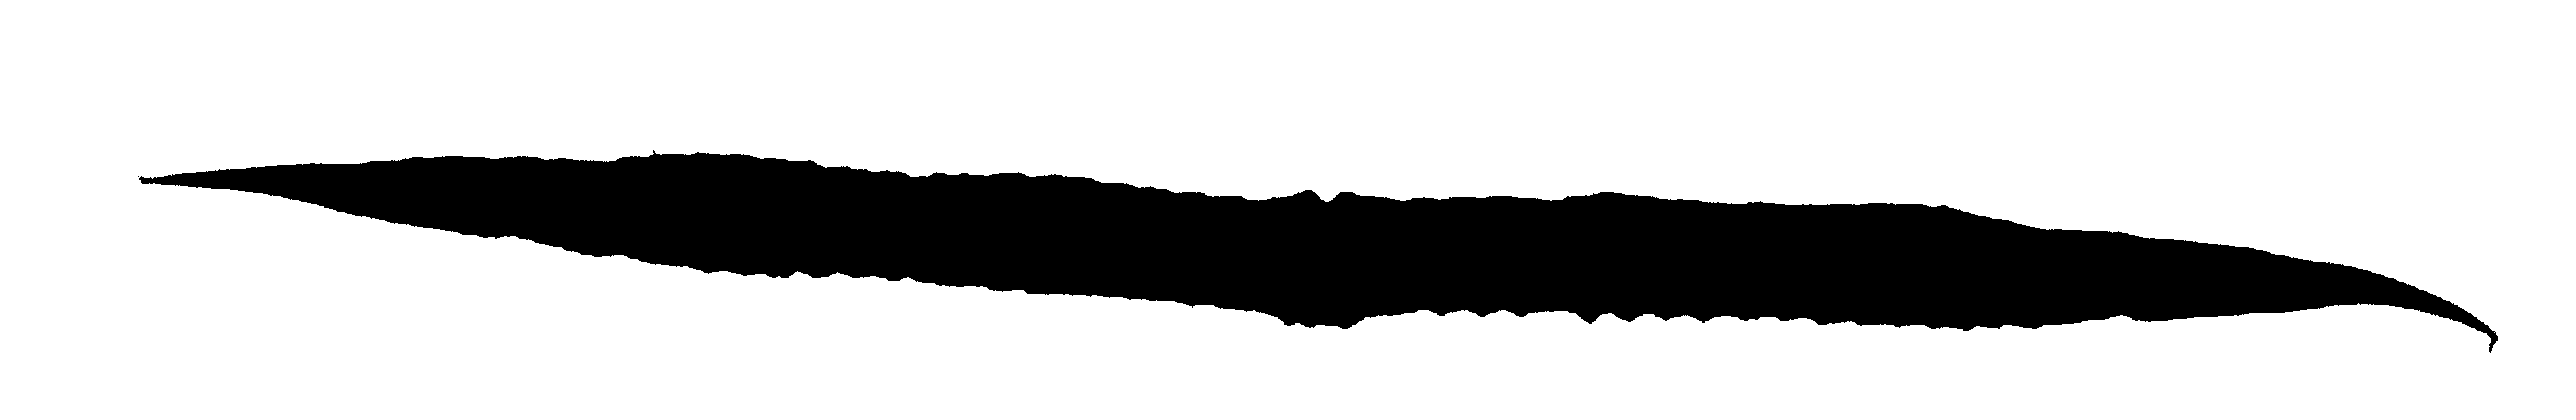

In [3]:
imagen

In [4]:
#La transformo en matriz
matrix=np.array(imagen)
np.size(matrix)
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
#Calibracion pix/mm
Cal = 81.9010

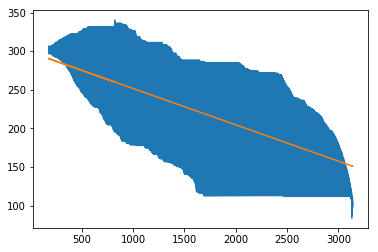

In [6]:
#Ploteo la altura en funcion de la longitud y ajusto todos los puntos por una recta para obtener el angulo de inclinacion de la imagen
x=[]
y=[]
L_filas = len(matrix[:,0])
L_columnas = len(matrix[0,:])
for i in range(L_filas):
    for j in range(L_columnas):
        if matrix[i,j]==255:
            x.append(j)
            y.append(L_filas-1-i)
x=np.asarray(x)
y=np.asarray(y)
grad, inter, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x,y)
plt.plot(x,grad*x+inter)

In [7]:
#Roto la imagen ese angulo de inclinacion
f = imagen.rotate(-np.arctan(grad)*180/np.pi, expand=True)
matrixf = np.array(f)

(3262, 680)


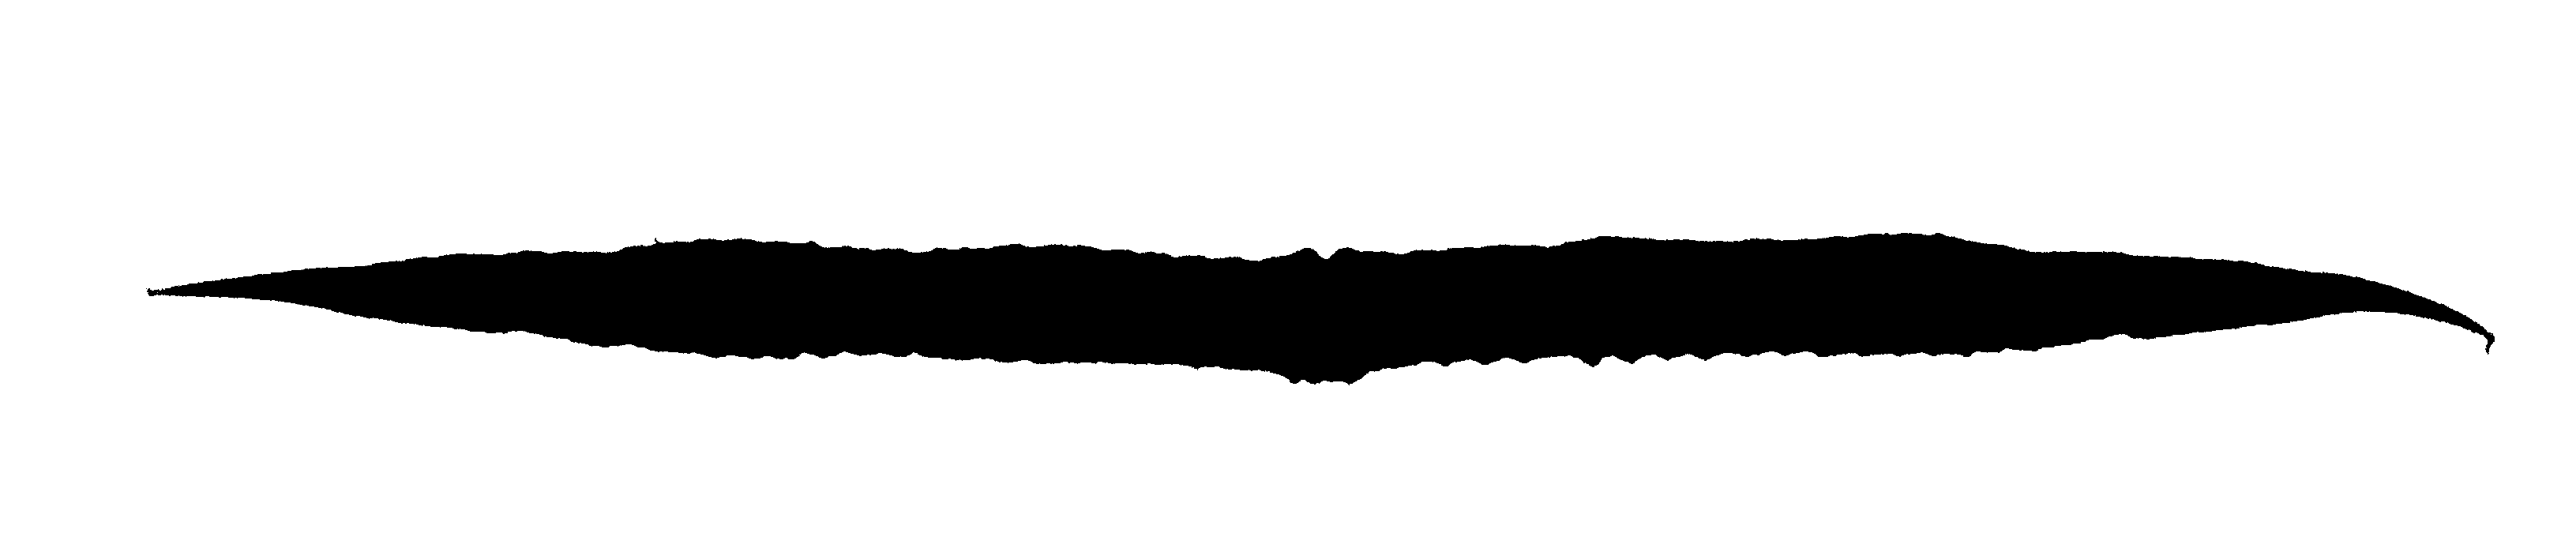

In [8]:
print(np.size(f))
f

(3240, 528)


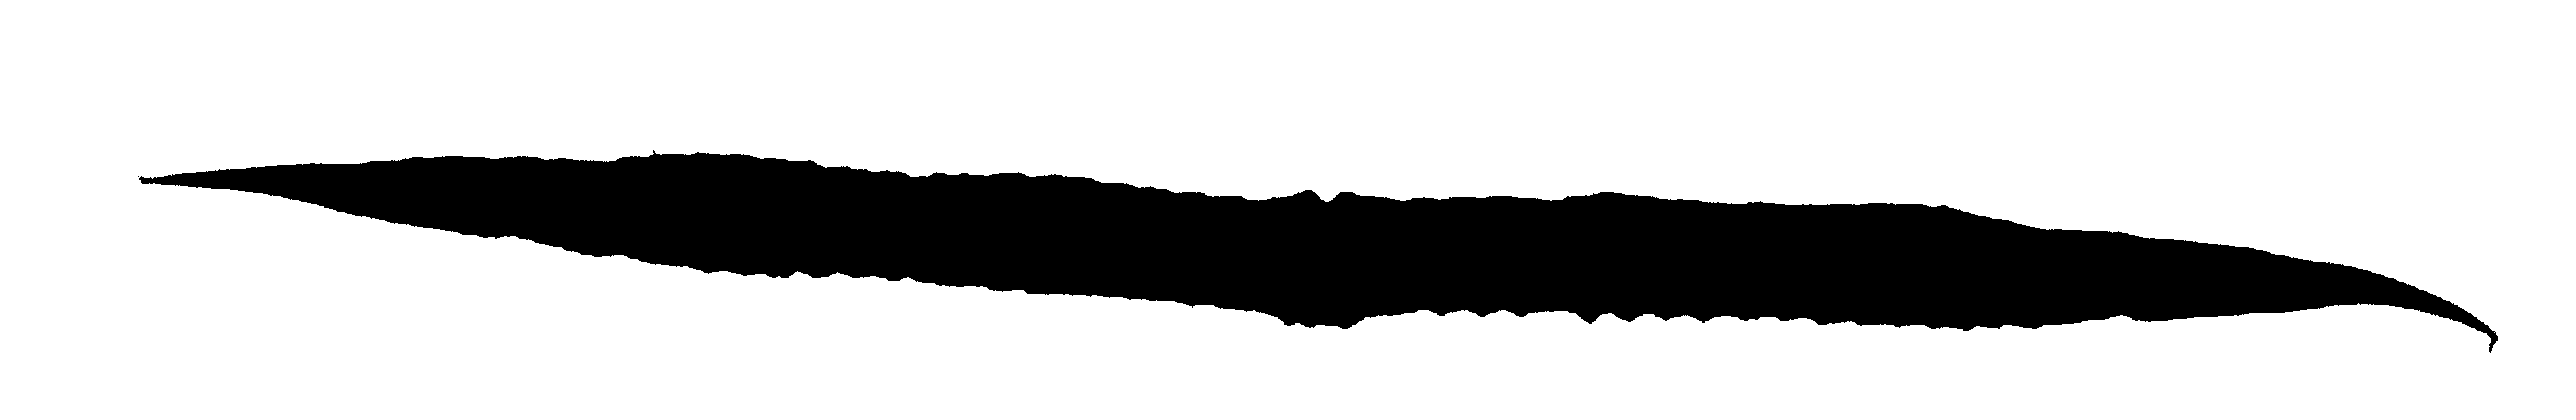

In [9]:
print(np.size(imagen))
imagen

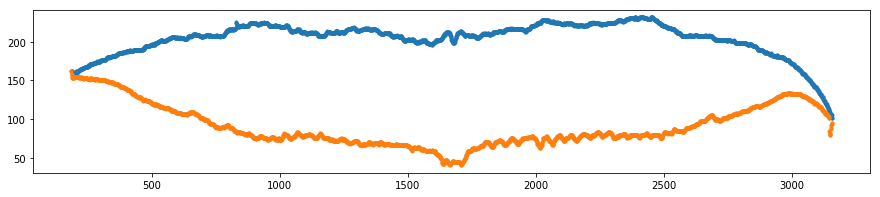

In [10]:
XM=[]
Xm=[]
YM=[]
Ym=[]
#Maximos
for j in range(L_columnas):
    for i in range(L_filas):
        if matrixf[i,j]==255:
            XM.append(j)
            YM.append(L_filas-1-i)
            break
#Minimos            
for j in range(L_columnas):
    for i in range(L_filas):
        if matrixf[L_filas-1-i,j]==255:
            Xm.append(j)
            Ym.append(i)
            break
            
XM=np.asarray(XM)
YM=np.asarray(YM)
Xm=np.asarray(Xm)
Ym=np.asarray(Ym)

plt.figure(figsize=(15,3))
plt.plot(XM,YM,'.')
plt.plot(Xm,Ym,'.')

In [11]:
len(XM),len(Xm)

(2974, 2974)

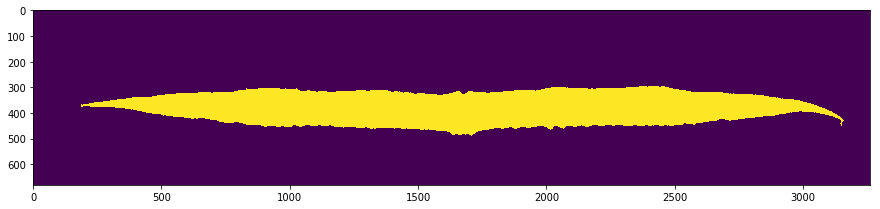

In [12]:
plt.figure(figsize=(15,10))
plt.imshow(matrixf)

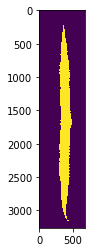

In [13]:
#Alturas
matrixt = np.matrix.transpose(matrixf)
plt.imshow(matrixt)

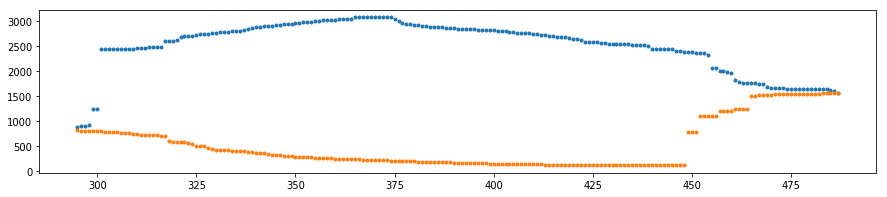

In [14]:
XM=[]
Xm=[]
YM=[]
Ym=[]
L_filas = len(matrixt[:,0])
L_columnas = len(matrixt[0,:])
#Maximos
for j in range(L_columnas):
    for i in range(L_filas):
        if matrixt[i,j]==255:
            XM.append(j)
            YM.append(L_filas-1-i)
            break
#Minimos            
for j in range(L_columnas):
    for i in range(L_filas):
        if matrixt[L_filas-1-i,j]==255:
            Xm.append(j)
            Ym.append(i)
            break
            
XM=np.asarray(XM)
YM=np.asarray(YM)
Xm=np.asarray(Xm)
Ym=np.asarray(Ym)

plt.figure(figsize=(15,3))
plt.plot(XM,YM,'.')
plt.plot(Xm,Ym,'.')

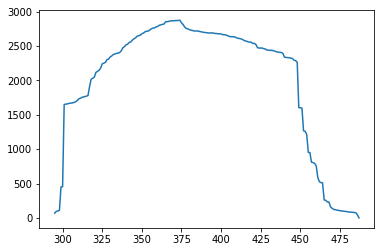

In [15]:
plt.plot(Xm,YM-Ym)